In [14]:
import numpy as np
import os
import time
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout,Activation,Flatten

from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.python.keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

In [7]:
IMAGE_SIZE = 224

## Setting up for Training

In [11]:
# Define data path
data_path = '/home/srmdlrl/project/data/currency/train_dir'
data_dir_list = os.listdir(data_path)

img_data_list=[]

for dataset in sorted(data_dir_list):
    img_list=os.listdir(data_path+'/'+ dataset)[:150]
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        img_path = data_path + '/'+ dataset + '/'+ img 
        img = image.load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
        x = image.img_to_array(img)
        x = preprocess_input(x)
        # print('Input image shape:', x.shape)
        img_data_list.append(x)

Loaded the images of dataset-fifty

Loaded the images of dataset-fivehundred

Loaded the images of dataset-hundred

Loaded the images of dataset-ten

Loaded the images of dataset-thousand

Loaded the images of dataset-twenty



In [12]:
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
print(img_data.shape)

(900, 224, 224, 3)


In [15]:
# Define the number of classes
num_classes = 6
num_of_samples = (img_data.shape[0])
labels = np.ones((num_of_samples,), dtype='int64')

labels[:101]=0
labels[101:201]=1
labels[201:301]=2
labels[301:401]=3
labels[401:501]=4
labels[501:601]=5

names = ['fifty', 'fivehundred', 'hundred', 'ten', 'thousand', 'twenty']
# convert class Labels to one-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

# Shuffle the dataset
x, y= shuffle(img_data, Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [16]:
model = ResNet50(weights='imagenet', include_top=False)

In [17]:
last_layer = model.output

# add a global spatial average pooling layer
x = GlobalAveragePooling2D()(last_layer)

# Add fully connected & dropout layers
x = Dense(512, activation='relu', name='fc-1')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu', name='fc-2')(x)
x = Dropout(0.5)(x)

# softmax layer for 5 classes
out = Dense(num_classes, activation='softmax', name='output_layer')(x)

custom_resnet_model2 = Model(model.input, outputs=out)

for layer in custom_resnet_model2.layers[:-10]:
    layer.trainable = False
    
custom_resnet_model2.layers[-1].trainable

True

## Training step

In [18]:
custom_resnet_model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# training model
t=time.time()
hist = custom_resnet_model2.fit(X_train, y_train, batch_size=32, epochs=11, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s secs' % (time.time() - t ))

Train on 720 samples, validate on 180 samples
Epoch 1/11
720/720 [==============================] - 74s 103ms/step - loss: 2.0680 - acc: 0.3306 - val_loss: 1.5950 - val_acc: 0.4000
Epoch 2/11
720/720 [==============================] - 72s 100ms/step - loss: 1.6207 - acc: 0.4000 - val_loss: 1.3067 - val_acc: 0.4778
Epoch 3/11
720/720 [==============================] - 72s 101ms/step - loss: 1.4188 - acc: 0.4806 - val_loss: 1.3201 - val_acc: 0.4778
Epoch 4/11
720/720 [==============================] - 73s 102ms/step - loss: 1.2830 - acc: 0.5042 - val_loss: 1.1459 - val_acc: 0.5278
Epoch 5/11
720/720 [==============================] - 73s 102ms/step - loss: 1.1760 - acc: 0.5569 - val_loss: 1.2132 - val_acc: 0.5111
Epoch 6/11
720/720 [==============================] - 73s 102ms/step - loss: 1.0683 - acc: 0.5847 - val_loss: 1.1467 - val_acc: 0.5556
Epoch 7/11
720/720 [==============================] - 73s 101ms/step - loss: 1.0276 - acc: 0.6111 - val_loss: 1.2175 - val_acc: 0.5333
Epoch 8/1

## Setting up for Evaluation

In [19]:
# Define data path
data_path = '/home/srmdlrl/project/data/currency/test_dir'
data_dir_list = os.listdir(data_path)

img_data_list=[]

for dataset in sorted(data_dir_list):
    img_list=os.listdir(data_path+'/'+ dataset)[:10]
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        img_path = data_path + '/'+ dataset + '/'+ img 
        img = image.load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
        x = image.img_to_array(img)
        x = preprocess_input(x)
        # print('Input image shape:', x.shape)
        img_data_list.append(x)

Loaded the images of dataset-fifty

Loaded the images of dataset-fivehundred

Loaded the images of dataset-hundred

Loaded the images of dataset-ten

Loaded the images of dataset-thousand

Loaded the images of dataset-twenty



In [20]:
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
print(img_data.shape)

(60, 224, 224, 3)


In [29]:
num_of_samples = (img_data.shape[0])
labels = np.ones((num_of_samples,), dtype='int64')

labels[:101]=0
labels[101:201]=1
labels[201:301]=2
labels[301:401]=3
labels[401:501]=4
labels[501:601]=5

# convert class Labels to one-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

x_test, y_test = img_data, Y

In [30]:
(loss, accuracy) = custom_resnet_model2.evaluate(x_test, y_test, batch_size=1, verbose=1)
print('[INFO] loss = {:.4f}, accuracy: {:.4f}%'.format(loss, accuracy * 100))

60/60 [==============================] - 9s 149ms/step
[INFO] loss = 4.2496, accuracy: 6.6667%


In [31]:
import matplotlib.pyplot as plt

In [32]:
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['acc']
val_acc = hist.history['val_acc']
xc = range(11)

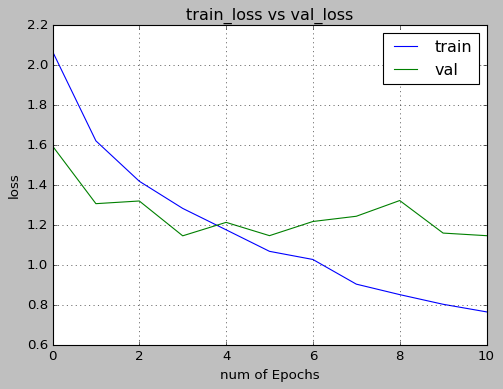

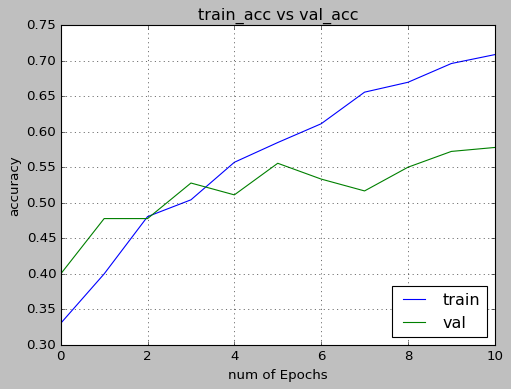

In [35]:
plt.figure(1, figsize=(7, 5))
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train', 'val'])
plt.style.use(['classic'])

plt.figure(2, figsize=(7, 5))
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train', 'val'], loc=4)
plt.style.use(['classic'])
plt.show()